# Introdução:

-Contextualização-
A busca pela sustentabilidade vem crescendo cada vez mais no contexto atual de mudanças climáticas, com o uso de materiais poluentes e não degradáveis por grandes indústrias, o que afeta o ecossistema global. Nesse sentido, estudar sistemas renováveis, como as energias solares, hidroelétricas, entre outros, é de suma importância, visando compreender seus componentes e potencial para aplicação em larga escala, substituindo gradativamente as fontes não renováveis. [1,2]

-Problema e Alternativa-
Encontrar os parâmetros desses sistemas que maximizem sua eficiência é uma tarefa difícil, especialmente se o tipo de energia contém várias instâncias, aumentando a complexidade do problema. Assim, o uso de ferramentas de Aprendizado de Máquina (*Machine Learning*, ou ML) é uma maneira eficaz para compreender a relação entre os diferentes parâmetros, permitindo fazer previsões sobre os dados fornecidos, tais como a capacidade de armazenamento de energia e de redução de gases do efeito estufa (ou Green House Gases, GHG's). [3,4]

-Redes neurais-
Nesse sentido, combinar técnicas de ML com o Aprendizado Profundo (*Deep Learning*, ou DL) é uma estratégia interessante para estudar os sistemas de energia, sendo possível fazer previsões para os parâmetros desses sistemas e otimizá-los. Um exemplo de DL são as redes neurais, como a *Multi Layer Perceptron* (MLP), cuja arquitetura varia para cada parâmetro considerado. [5] Logo, o objetivo deste projeto é identificar e otimizar os hiperparâmetros de uma rede neural do tipo MLP para resolver um problema de regressão de interesse científico. 

-Dataset e passo a passo-
Usou-se um dataset sobre sistemas de energia renovável [6] para o treinamento do modelo. Esse dataset contém informações detalhadas sobre diferentes sistemas de energia, que serão descritos abaixo. Nosso alvo (ou *target*) a ser estimado é X e Y, logo nesse notebook faremos uma análise inicial dos dados focando no target, computando algumas estatísticas descritivas e gráficos ilustrativos.

#Explicar o trabalho, dataset, pré-processamento
#Talvez usar GHG_Emission_Reduction_tCO2e como target tb, mais fácil de justificar e trabalhar, pode usar 2 #targets

## Importações e definições:

Começamos importando as bibliotecas necessárias:

In [14]:
import pandas as pd
import numpy as np
import os
import statistics as st
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import torch
import torch.nn as nn
import torch.optim as optim


Em seguida, iremos importar o dataset a ser utilizado, removendo valores faltantes e exibindo-o em seguida.

In [3]:
df_energia = pd.read_csv('energy_dataset_.csv')
df_energia = df_energia.dropna()
df_energia

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3,745.032555,280007.5738,230544.8268,4351.687893,90.791405,4,3.484136e+08,2,1.558508e+07,25234.911810,78.923200,1452
14996,1,15.187023,377340.5803,358547.3589,6792.194696,78.252040,4,2.560179e+08,3,6.866618e+06,15762.519790,54.982974,2598
14997,3,877.539059,480497.3920,214441.6719,4588.725297,58.282928,1,1.300112e+08,2,3.837764e+06,44597.809410,43.915897,2713
14998,7,551.264716,436383.1694,137043.8713,7251.144215,73.573666,2,3.334831e+08,2,5.347706e+06,34363.858000,4.877145,2128


### 🔍 Características das Features

🔋 `Type_of_Renewable_Energy`:

Tipo de fonte de energia renovável (dados categóricos):

- `1`: ☀️ Solar  
- `2`: 🌬️ Wind (Eólica)  
- `3`: 💧 Hydroelectric (Hidroelétrica)  
- `4`: 🌋 Geothermal (Geotermal)  
- `5`: 🌿 Biomass (Biomassa)  
- `6`: 🌊 Tidal (Maré)  
- `7`: 🌊 Wave (Ondas)


⚡ `Installed_Capacity_MW`:

Capacidade instalada em Megawatts (MW)


🔌 `Energy_Production_MWh`:

Produção anual de energia em Megawatts-hora (MWh)



🔋 `Energy_Consumption_MWh`:

Consumo anual de energia em Megawatts-hora (MWh)



🏗️ `Grid_Integration_Level`:

Nível de integração com a rede elétrica (dados categóricos):

- `1`: ✅ Fully Integrated (Totalmente integrada)  
- `2`: ⚠️ Partially Integrated (Parcialmente integrada)  
- `3`: 🔻 Minimal Integration (Integração mínima)  
- `4`: 🔌 Isolated Microgrid (Microrrede isolada)



💰 `Founding_Sources`:

Fonte de investimento (dados categóricos):

- `1`: 🏛️ Government (Governamental)  
- `2`: 🏢 Private (Privada)  
- `3`: 🤝 Public-Private Partnership (Colaboração Público e Privado)



💵 `Inicial_Investiment_USD`:

Investimento inicial em dólares (USD)



🌱 `GHG_Emission_Reduction_tCO2e`:

Redução das emissões de gases de efeito estufa (tCO2e)


🌬️ `Air_Pollution_Reduction_Index`:

Índice de redução da poluição do ar


### 🔎 Caracterísitcas do Target

🔌 `Storage_Efficiency_Percentage`: 
     
Eficiência de armazenamento de energia em porcentagem


### 🕵️ Explorando o Dataset

Em um primeiro momento, é interessante investigar os dados que compreendem o *target* do projeto, isto é, a porcentagem de eficiência de armazenamento de energia (Storage_Efficiency_Percentage), visando uma melhor compreensão de sua distribuição, bem como de como se comportam. Nesse sentido, utilizando a biblioteca `statistics`, algumas estatísticas descritivas dos dados serão analisadas. Dentre elas, encontra-se a média, a mediana, o desvio-padrão e os valores mínimo e máximo, com o intuito de analisar a tendência dos dados a serem previstos, bem como a distribuição deles. [1]

#### 🌘 Média

A média é calculada a partir da divisão da soma de todos os elementos que compõe uma variável aleatória pela quantidade total de termos. Essa estatística nos fornece uma tendência central dos valores da variável analisada.

$$
\mu = \frac{1}{N} \sum_{i=1}^{N} X_i
$$

[Fórmula 1: Cálculo da média]

In [ ]:
media_target = st.mean(df_energia["Storage_Efficiency_Percentage"])
print(f'A média da porcentagem de eficiência energética é igual a {media_target:2f}.')

#### 🌗 Mediana

A mediana consiste em uma estatística que apresenta o valor que segrega a variável aleatória na metade, isto é, em dois grupos de mesmo tamanho, compreendendo o valor central da variável analisada. Por não ser influenciada por valores discrepantes que compõe o conjunto explorado - os famosos *outliers*-, a mediana compreende uma métrica mais robusta para compreender a tendência central dos dados, sobretudo quanto possuímos variáveis aleatórias com *outliers*.

In [9]:
mediana_target = st.median(df_energia["Storage_Efficiency_Percentage"])
print(f'A mediana da porcentagem de eficiência energética é igual a {mediana_target:2f}.')

A mediana da porcentagem de eficiência energética é igual a 75.279701875.


#### 🌖 Desvio-padrão

O desvio-padrão compreende o quão distante da média se encontram os valores que compõe a variável aleatória analisada.

$$
\sigma = \sqrt{\mathrm{Var(X)}} =  \sqrt{\frac{1}{N} \sum_{i=1}^{N} (X_i - \mu)^2}
$$

[Fórmula 2: Cálculo do desvio-padrão]

In [8]:
desvio_padrao_target = st.pstdev(df_energia["Storage_Efficiency_Percentage"])
print(f'O desvio-padrão da porcentagem de eficiência energética é igual a {desvio_padrao_target:2f}.')

O desvio-padrão da porcentagem de eficiência energética é igual a 14.484806549643743.


#### 🌕 Valores Mínimo e Máximo 

Através da análise do menor valor dos dados (mínimo) e do maior valor contido no conjunto (máximo), é possível compreender melhor a distribuição da variável aleatória analisada, assim como entender o resultado de outras métricas computadas, a exemplo da média, da mediana e do desvio-padrão.

In [12]:
valor_minimo_target = min(df_energia["Storage_Efficiency_Percentage"])
print(f'O menor valor da porcentagem de eficiência energética é igual a {valor_minimo_target:2f}.')

O menor valor da porcentagem de eficiência energética é igual a 50.0034939.


In [13]:
valor_maximo_target = max(df_energia["Storage_Efficiency_Percentage"])
print(f'O maior valor da porcentagem de eficiência energética é igual a {valor_maximo_target:2f}.')

O desvio-padrão da porcentagem de eficiência energética é igual a 99.99495491.


### 🌑 O que podemos tirar disso?

Pautando-se nas estatísticas descritivas apresentadas, podemos obter informações valiosas acerca dos dados que se pretende prever no presente projeto, isto é, do *target*. Desse modo, com base nos valores de média e mediana próximos, bem como nos valores máximo e mínimo - os quais não tão distantes entre si, fica evidente que os dados não apresentam valores tão discrepantes, isto é, não há *outliers* consideráveis. Tal observação é amparada haja vista o baixo resultado obtido para o desvio-padrão do *target* observado. Além disso, o Gráfico 1, que apresenta um *boxplot* dos dados que compõe o conjunto analisado, suporta a conclusão exprimida, já que demonstra a ausência de *outliers*, assim como mostra que a maior parte dos dados encontra-se próximo a mediana (segundo quartil). Ainda com base na observação do *boxplot*, é possível denotar que essa métrica se revela (aparentemente) equidistante do primeiro quartil (que contém 25% dos dados) e do terceiro quartil (que abrange 75% dos dados).

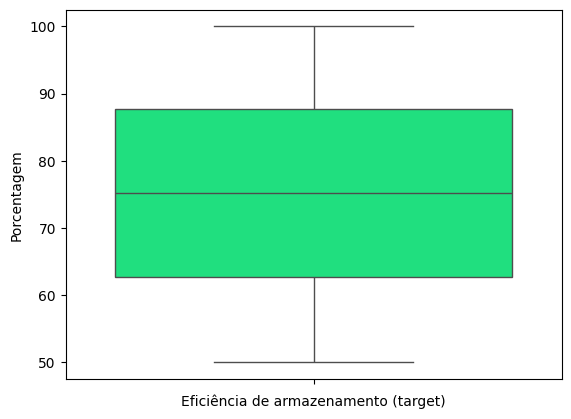

In [29]:
eixo = sns.boxplot(y=df_energia["Storage_Efficiency_Percentage"], color = "SpringGreen")
eixo.set_xlabel("Eficiência de armazenamento (target)")
eixo.set_ylabel("Porcentagem");

[Gráfico 1: *Boxplot* do *taget* do projeto]

In [ ]:
# df_energia_normalizado = df_energia.copy()
# colunas_fixas = ['Type_of_Renewable_Energy', 'Grid_Integration_Level','Funding_Sources']
# colunas_variaveis = df_energia_normalizado.columns.difference(colunas_fixas)

# normalizador = StandardScaler()
# df_energia_normalizado[colunas_variaveis] = normalizador.fit_transform(df_energia_normalizado[colunas_variaveis])
# df_energia_normalizado

In [ ]:
TARGET = "Storage_Efficiency_Percentage"
FEATURES = [
    "Type_of_Renewable_Energy",
    "Grid_Integration_Level",
    "Funding_Sources",
    "GHG_Emission_Reduction_tCO2e",
    "Installed_Capacity_MW",
    "Energy_Production_MWh",
    "Energy_Consumption_MWh",
    "Initial_Investment_USD",
    "Air_Pollution_Reduction_Index",

]

In [ ]:
X = df_energia[FEATURES]  
y = df_energia[TARGET] 

In [ ]:
X.describe(include = "all")

In [ ]:
y.describe(include = "all")

In [ ]:
X_valores = X.values
y_valores = y.values

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_valores, y_valores, test_size=0.1, random_state=1249)


## 📜 Referências

[1] Programa das Nações Unidas para o Desenvolvimento. (2024, 25 de abril). What is the sustainable energy transition and why is it key to tackling climate change? Climate Promise. Recuperado de https://climatepromise.undp.org/news-and-stories/what-sustainable-energy-transition-and-why-it-key-tackling-climate-change

[2] Organização das Nações Unidas. (s.d.). Renewable energy – Powering a safer future. Recuperado em 2 de junho de 2025, de https://www.un.org/en/climatechange/raising-ambition/renewable-energy

[3] Ergun, S., Dik, A., Boukhanouf, R., & Omer, S. (2025). Large-Scale Renewable Energy Integration: Tackling Technical Obstacles and Exploring Energy Storage Innovations. Sustainability, 17(3), 1311. https://doi.org/10.3390/su17031311

[4] Alabi, M. (2023). Integrating Machine Learning into Renewable Energy Systems for Better Forecasting. ResearchGate. https://www.researchgate.net/publication/384329216_Integrating_Machine_Learning_into_Renewable_Energy_Systems_for_Better_Forecasting

[5] Alharbi, A. H., Khafaga, D. S., Zaki, A. M., M., S., Ibrahim, A., Abdelhamid, A. A., Eid, M. M., Khodadadi, N., Abualigah, L., & Saeed, M. A. (2024). Forecasting of energy efficiency in buildings using multilayer perceptron regressor with waterwheel plant algorithm hyperparameter. Frontiers in Energy Research, 12, 1393794. https://doi.org/10.3389/fenrg.2024.1393794

[6] Kaggle. (2024). Renewable Energy Systems Data. https://www.kaggle.com/datasets/girumwondemagegn/dataset-for-renewable-energy-systems?select=energy_dataset_.csv. 

[7] Daniel Roberto Cassar. (2024). Jupyter Notebook LMA-203 1.0 - Estatística descritiva. [Material não publicado].